## Advanced House Price Prediction - Feature Selection

In this series, We will look at the end to end ML pipeline and we have selected this dataset for the same as it needs all the preprocessing steps and prediction.

In this notebook we will be looking at the Feature Selection part.

### Types:

***Feature Selection***:
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix

In [55]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso

In [5]:
# To display all the columns
pd.set_option('display.max_columns', None)

In [6]:
# Reading the feature engineered data

df = pd.read_csv('./X_train.csv')

df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage-NaN,MasVnrArea-NaN,GarageYrBlt-NaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.75,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.75,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.75,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


In [12]:
df.shape

(1460, 84)

In [11]:
# Creating the X and y variables

X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

print(X.shape, y.shape)

(1460, 82) (1460,)


### 1. Univariate Selection

In univariate selection, we use statistical tests to select the features that have the strongest relationship with the output variable.

Here we use SelectKBest class in scikit learn with Chi-squared(chi2) test.

In [14]:
# Selecting the top 20 features

best_features = SelectKBest(score_func=chi2, k=20)
best_features_fit = best_features.fit(X, y)

ValueError: Unknown label type: (array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345]),)

**Note**: We can use chi2 test only when the target variable is categorical. But in our case our target variables is continuous so we cannot use chi2 test for regression.

### 2. Feature Importance

Feature Importance gives us a score for each feature in our dataset, Higher the score more important the feature is w.r.t our target variable.

Here we will be using ExtraTreesRegressor (For classification problem we have to use ExtraTreesRegressor).

In [17]:
# Looking at the feature importances using ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [18]:
# Looking at the scores

model.feature_importances_

array([3.66135861e-03, 1.11513670e-02, 4.23465563e-03, 8.38793439e-03,
       3.38341924e-04, 1.81769204e-03, 2.34371103e-03, 2.95205589e-03,
       4.67369247e-06, 1.86116638e-03, 2.13278344e-03, 4.30589618e-03,
       1.69026884e-03, 3.63013195e-04, 3.55442703e-03, 1.72057851e-03,
       2.24036467e-01, 6.65732143e-03, 2.13261730e-02, 5.92694629e-03,
       2.25115633e-03, 4.54027130e-04, 1.88025824e-03, 1.94569888e-03,
       1.74264116e-03, 2.46152153e-03, 1.75689064e-01, 2.89523576e-03,
       4.81223017e-03, 2.28457579e-02, 2.13826124e-03, 2.55234145e-03,
       3.66323580e-03, 9.99248613e-03, 8.39960494e-04, 1.03094666e-03,
       2.64875150e-03, 1.73624392e-02, 4.15185802e-04, 2.35791280e-03,
       3.16386010e-02, 1.28854937e-03, 2.01403557e-02, 8.92560505e-03,
       4.73470821e-04, 8.00281265e-02, 5.79005692e-03, 8.92526210e-04,
       3.89018793e-02, 5.35552663e-03, 6.90995729e-03, 2.25102526e-03,
       2.22463125e-02, 6.92442164e-03, 1.87787758e-03, 2.59472202e-02,
      

In [32]:
imp_features_df = pd.DataFrame({ 'Features': X.columns,
                                 'Scores': model.feature_importances_})

imp_features_df

,Features,Scores
0,MSSubClass,0.003661
1,MSZoning,0.011151
2,LotFrontage,0.004235
3,LotArea,0.008388
4,Street,0.000338
...,...,...
77,SaleType,0.001628
78,SaleCondition,0.004192
79,LotFrontage-NaN,0.000918
80,MasVnrArea-NaN,0.000067


In [33]:
imp_features_df = imp_features_df.sort_values(by='Scores', ascending=False)

imp_features_df.head()

,Features,Scores
16,OverallQual,0.224036
26,ExterQual,0.175689
45,GrLivArea,0.080028
60,GarageCars,0.076922
48,FullBath,0.038902


In [34]:
# Looking at the top 10 features
imp_features_df.head(10)

,Features,Scores
16,OverallQual,0.224036
26,ExterQual,0.175689
45,GrLivArea,0.080028
60,GarageCars,0.076922
48,FullBath,0.038902
40,CentralAir,0.031639
55,Fireplaces,0.025947
57,GarageType,0.024096
29,BsmtQual,0.022846
52,KitchenQual,0.022246


In [41]:
# Top 20 features
imp_features_df.head(20)

,Features,Scores
16,OverallQual,0.224036
26,ExterQual,0.175689
45,GrLivArea,0.080028
60,GarageCars,0.076922
48,FullBath,0.038902
40,CentralAir,0.031639
55,Fireplaces,0.025947
57,GarageType,0.024096
29,BsmtQual,0.022846
52,KitchenQual,0.022246


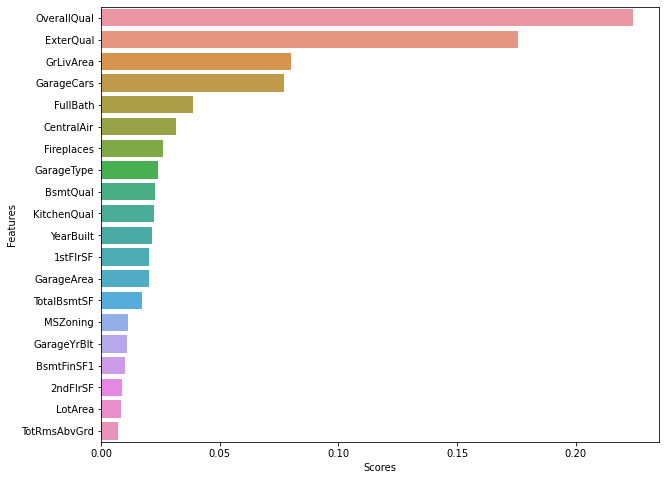

In [42]:
# Plotting the top 20 features
plt.figure(figsize=(10,8))
sns.barplot(data=imp_features_df.head(20), y='Features', x='Scores')
plt.show()

### 3. Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library

In [43]:
correlation_matrix = df.corr()

correlation_matrix

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage-NaN,MasVnrArea-NaN,GarageYrBlt-NaN
Id,1.000000,-0.017942,0.011156,-0.004444,-0.017214,-0.017482,0.008916,-0.002855,0.032122,-0.019659,0.013324,0.053018,0.005847,-0.009769,0.004934,-0.041539,0.021912,0.017169,-0.028365,0.012609,0.012724,0.022049,0.018906,-0.013775,-0.036556,-0.045523,0.049090,-0.051071,-0.007753,0.030800,0.001184,0.047668,0.007223,-0.021987,0.016616,-0.005024,0.038259,-0.005968,-0.007940,-0.015415,0.050543,0.002157,0.009821,0.034334,0.009421,0.005590,-0.044230,0.004183,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.000614,-0.019772,0.003765,-0.011724,0.000161,-0.004626,0.016570,0.017634,0.002674,-0.006808,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,0.055511,-0.020950,-0.043723,-0.006242,0.021172,0.000712,0.021511,-0.022902,0.017691,0.021662,-0.013506
SalePrice,-0.017942,1.000000,-0.073959,-0.208181,0.345755,0.399918,0.057369,0.112834,-0.278091,0.032340,-0.012632,-0.064556,0.038526,0.185720,0.151107,-0.045333,-0.072558,0.092873,0.817184,-0.036868,-0.587290,-0.568136,0.161847,0.089917,0.111805,0.108175,0.099961,0.426775,-0.645331,0.154616,0.471849,-0.576968,0.122452,-0.251158,-0.125342,0.372023,0.094784,0.004832,0.221985,0.612134,-0.163469,-0.425906,0.351600,0.290353,0.608947,0.319300,-0.037963,0.730255,0.236224,-0.005149,0.594771,0.313982,0.209044,-0.147548,-0.534386,0.534422,0.112265,0.489449,-0.055688,-0.489070,-0.497073,-0.417404,0.680625,0.650888,0.333544,0.359675,0.304688,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,0.069835,-0.068573,-0.076045,-0.020021,0.057329,-0.037263,-0.181550,0.327672,0.044384,0.055952,-0.322999
MSSubClass,0.011156,-0.073959,1.000000,-0.016691,-0.477364,-0.462668,-0.024969,0.099430,0.119289,-0.002940,-0.022844,0.079567,-0.025672,0.012055,-0.022301,0.042011,0.746063,0.352042,0.032628,-0.059316,-0.028746,-0.041968,-0.116065,-0.029924,-0.100792,-0.129742,-0.030511,0.023573,-0.031058,-0.003729,0.066214,-0.081702,-0.017905,-0.066799,0.006437,-0.069836,0.048268,-0.065649,-0.140759,-0.238518,0.039799,0.020760,-0.101774,0.053575,-0.288607,0.307886,0.046474,0.081717,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.032091,-0.045569,0.050200,0.150067,-0.082451,-0.028806,-0.040110,-0.098672,-0.044846,-0.063456,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,0.008610,-0.025510,-0.048486,-0.007683,-0.013585,-0.021407,0.044747,-0.034513,-0.015323,-0.016496,0.085357
MSZoning,-0.004444,-0.208181,-0.016691,1.000000,-0.077408,-0.030976,0.041131,-0.383136,0.035026,-0.038999,0.000304,-0.024743,0.002620,-0.314038,-0.058544,0.036606,-0.048151,-0.047854,-0.192298,0.174585,0.331134,0.210699,0.022685,0.008315,0.003194,0.017180,-0.063707,-0.066873,0.257659,-0.102008,-0.262170,0.185436,-0.021651,0.010852,0.017834,-0.030058,-0.038220,0.037313,-0.051506,-0.069407,0.065737,0.164332,-0.075475,-0.085191,-0.029620,-0.074483,0.020411,-0.105389,-0.009418,0.021506,-0.218343,-0.154585,-0.001901,0.055161,0.137110,-0.027078,-0.072797,0.004114,0.006228,0.120058,0.284962,0.112745,-0.162603,-0.188583,-0.149137,-0.109280,-0.114895,0.003301,-0.174837,0.124856,0.006013,

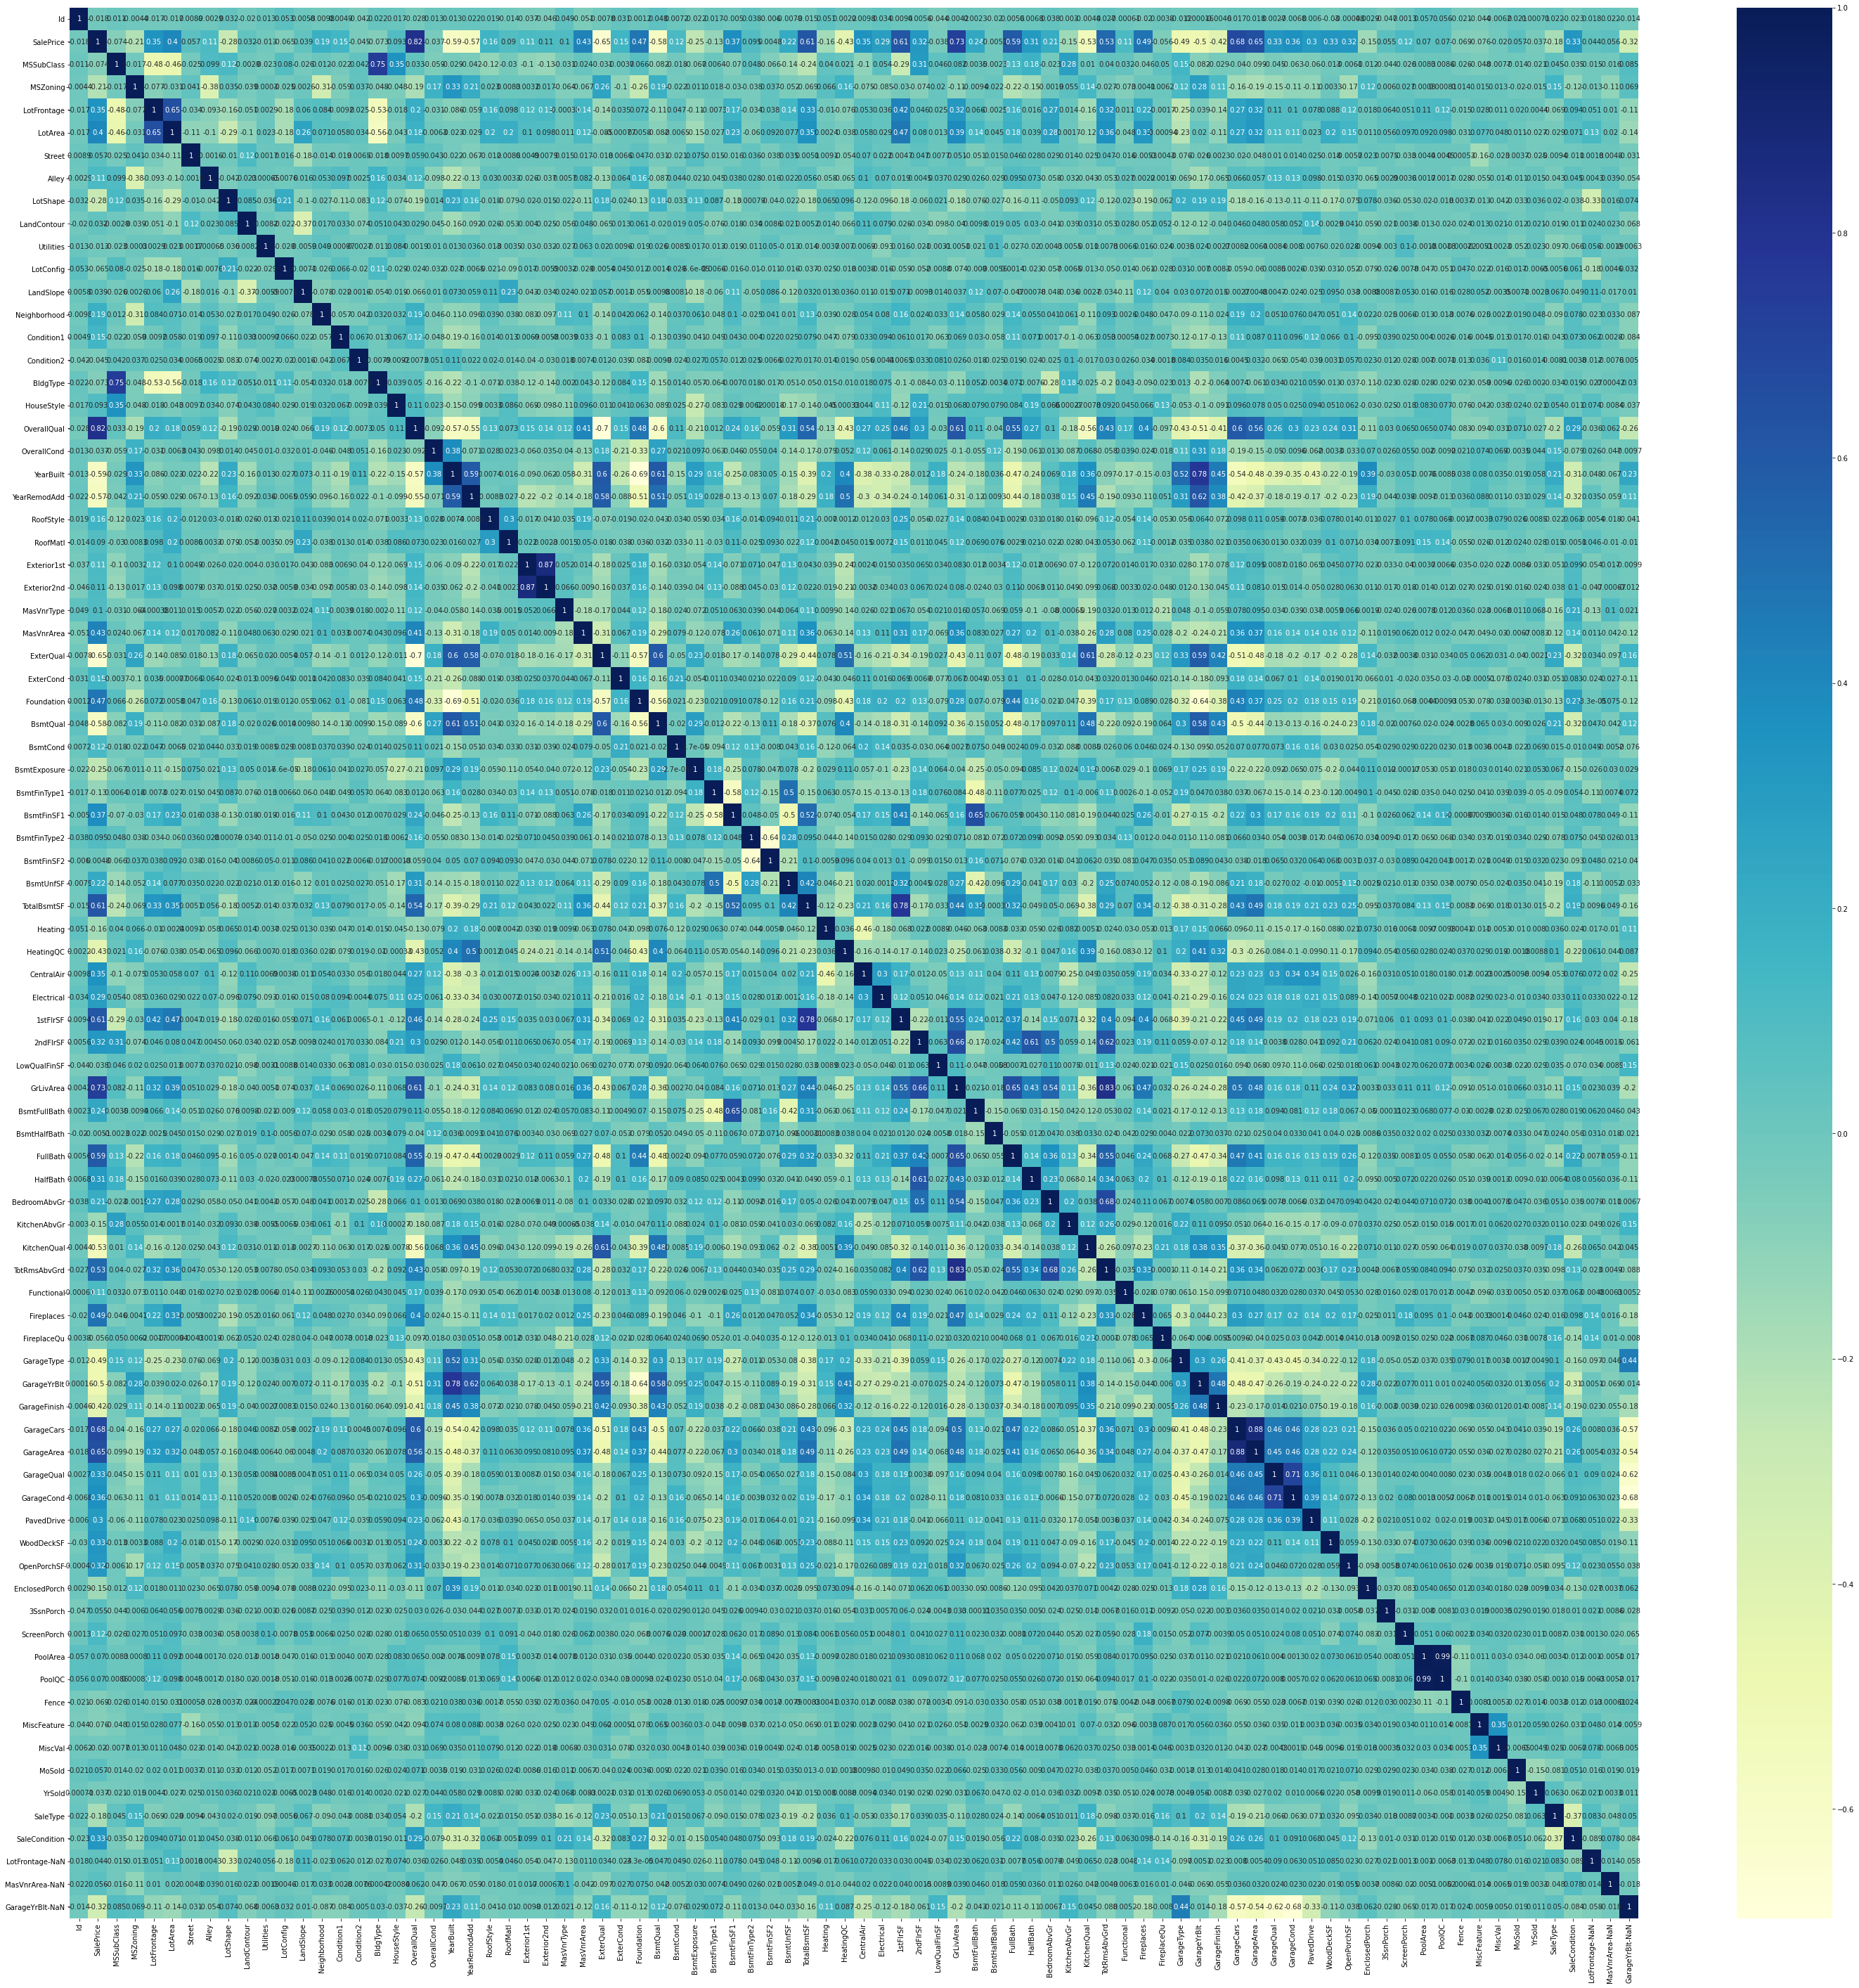

In [54]:
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

### 4. Using Lasso Regression and SelectFromModel

For Regression problem we can use Lasso Regression with SelectFromModel.

SelectFromModel selects the features based on the importance weights.

In [56]:
# Note: Higher the alpha value less number of features will be selected and
#       vice versa

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [59]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [60]:
selected_features = X.columns[feature_sel_model.get_support()]
selected_features

Index(['LotShape', 'BldgType', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

In [61]:
len(selected_features)

22

#### Note:

Look out ***RFE*** as well. Even RFE selects the features based on the importance weights.